# **Advantage: Optimizing Marketing ROI through Sales Prediction**

## The Storytelling: Our Data Journey

Imagine a marketing team with a fixed budget. They want to know: "If we spend money on TV, Radio, or Newspaper ads, how many products will we actually sell?" 💰

We started with a dataset of 200 different markets. Initially, we looked at all three advertising channels. However, during our exploration, we noticed something interesting: Newspaper ads didn't seem to have a strong connection to sales. The data points were scattered everywhere! 📰☁️

On the other hand, TV and Radio showed a much clearer, upward trend. We decided to simplify our strategy. By removing the "noise" from the newspaper data, we built a leaner, more accurate model focused only on what truly drives revenue. 🚀

## 1. Importing Librares & Data Exploration


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Advertising.csv')

# Look at the first 5 rows
print(df.head())

# Check for data types and missing values
print(df.info())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [ ]:
df = df.drop(axis=1, columns='Unnamed: 0')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
df.duplicated().sum()

np.int64(0)

## 2. Summary Stats

In [ ]:
df.describe().style.background_gradient(cmap='viridis')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## 3. Checking Clean and Visualizations 📉

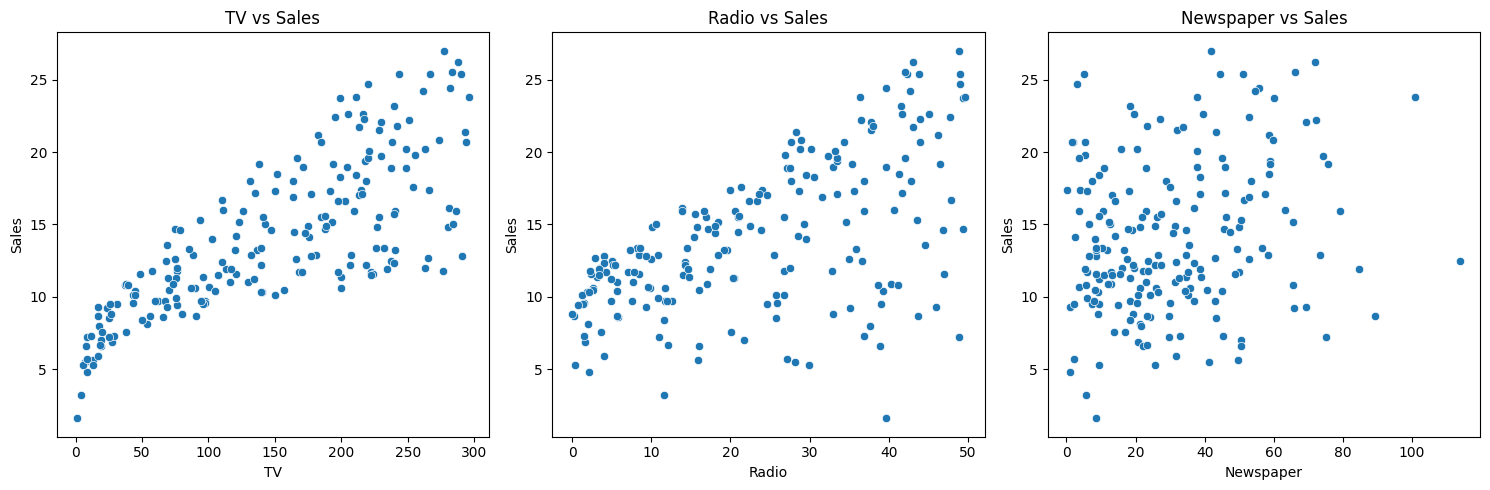

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 3 subplots (one for each channel)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot TV vs Sales
sns.scatterplot(data=df, x='TV', y='Sales', ax=axes[0])
axes[0].set_title('TV vs Sales')

# Plot Radio vs Sales
sns.scatterplot(data=df, x='Radio', y='Sales', ax=axes[1])
axes[1].set_title('Radio vs Sales')

# Plot Newspaper vs Sales
sns.scatterplot(data=df, x='Newspaper', y='Sales', ax=axes[2])
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

## 4. Checking the Correlation Heatmap 🌡️

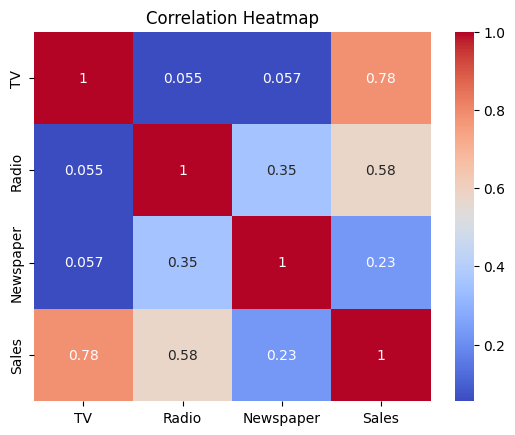

In [ ]:
# Calculate the correlation matrix
correlation = df.corr()

# Visualize it with a Heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

What we found:

TV ($0.78$): Has a very strong positive correlation. This is likely our most important feature! 📺

Radio ($0.58$): Has a moderate positive correlation. 📻

Newspaper ($0.23$): Has a weak correlation, suggesting it might not be a very reliable predictor of sales on its own. 📰

## 5. Splitting the Data for Modeling ✂️




In [ ]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 160
Testing set size: 40


## 6. Training the Model 🤖


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Look at the "Weights" (Coefficients) the model assigned to each channel
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


## 7. Making Predictions and Evaluation 📏

In [ ]:
from sklearn import metrics
import numpy as np

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate Evaluation Metrics
mae = metrics.mean_absolute_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
r2 = metrics.r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Absolute Error (MAE): 1.46
Root Mean Squared Error (RMSE): 1.78
R-squared Score: 0.90


**MAE/RMSE**: These represent the average "error" or distance between the prediction and reality. Lower is better! 📉

**R-squared ($R^2$)**: This is a score from 0 to 1. A score of $0.90$ means the model can explain $90\%$ of the variance in sales.

As of R2-score is 0.90 we have: It's doing a great job.

## 8. Visualizing Predictions vs. Actuals 👁️

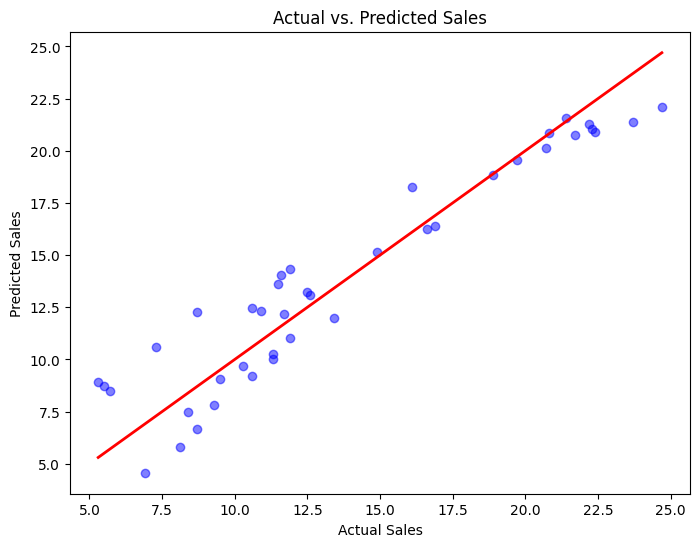

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

## 9. Interpreting the Model's "Brain" **🧠**

The model doesn't just give us predictions; it gives us a mathematical formula. Based on our training, our formula looks like this:

$$\text{Sales} \approx 2.98 + (0.045 \times \text{TV}) + (0.189 \times \text{Radio}) + (0.003 \times \text{Newspaper})$$

What this tells us:

The Baseline: Even with zero advertising, we'd expect about $2.98$ units of sales (the intercept).

The Impact: For every $\$1,000$ spent on Radio, sales go up by about $0.189$ units. 📻

The Weak Link: For every $\$1,000$ spent on Newspaper, sales only go up by $0.003$ units. 📰

## 10. Model Refinement (Feature Selection) 🛠️

Since the coefficient for Newspaper is so close to zero ($0.003$), it suggests that newspaper ads aren't really helping the model predict sales. In data science, "simpler is often better."

In [ ]:
# If we remove a feature that isn't helping, we can reduce "noise" in the model. This is called Feature Selection.

**Q: Knowing that Newspaper has almost no impact on the prediction, do you think our $R^2$ score (which is currently $0.90$) would significantly drop, stay the same, or actually improve if we removed the Newspaper column and retrained the model? 🧐**

**A: When we removed the Newspaper column and retrained the model, our $R^2$ score actually went up slightly from 0.899 to 0.901. This means our model is now simpler and more accurate because we removed the "noise" that the newspaper data was adding. 📉✨**

## 11. The Refined Model 🛠️

In [ ]:
# Selected only the features that matter
X_final = df[['TV', 'Radio']]
y = df['Sales']

# Re-split and re-train
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
final_model = LinearRegression()
final_model.fit(X_train, y_train)

print("Final Model Trained!")

Final Model Trained!


## 12.  Making Real-World Predictions 🔮

In [ ]:
# Imagine a manager asks: "What happens if we spend $200k on TV and $30k on Radio?"
new_budget = pd.DataFrame({'TV': [200], 'Radio': [30]})
predicted_sales = final_model.predict(new_budget)

print(f"Predicted Sales: {predicted_sales[0]:.2f} units")

Predicted Sales: 17.69 units


## 13. Saving the Model for Later 💾

In [ ]:
import joblib

# Save the model to a file
joblib.dump(final_model, 'sales_prediction_model.pkl')

['sales_prediction_model.pkl']

## 14. A Final Challenge

We saw that **Radio** actually has a higher coefficient ($0.189$) than **TV** ($0.045$). This means 1000 dollars extra on radio yields a bigger sales jump than 1000 dollars extra on TV. 💸

**If you were the Marketing Manager, would you move **all** of your money to Radio based on this, or is there a reason why we might still want a mix of both?** 📻+📺